# PyTorch
![pyt](https://miro.medium.com/v2/resize:fit:691/1*VSQ0XEywxSgZBwW05GsZtw.png)

PyTorch is an open-source machine learning library developed by Facebook's AI Research Lab (FAIR). It provides a dynamic computation graph and automatic differentiation for rapid prototyping, research, and production deployment. PyTorch is particularly popular in the field of deep learning.
Key Features
1. Dynamic Computation Graph
PyTorch's computation graph is built on the fly, allowing for more flexible and efficient computation. This is in contrast to static computation graphs used in other frameworks like TensorFlow.
2. Automatic Differentiation
PyTorch provides automatic differentiation, which enables the computation of gradients, a crucial step in training neural networks.
3. Modular Architecture
PyTorch's architecture is modular, making it easy to integrate with other frameworks and libraries.
4. Pythonic API
PyTorch's API is designed to be intuitive and Pythonic, making it easy to learn and use.
5. GPU Acceleration
PyTorch supports GPU acceleration, allowing for fast computation on NVIDIA GPUs.
6. Extensive Libraries and Tools
PyTorch has an extensive set of libraries and tools, including:
torch.nn: a neural network module
torch.optim: an optimization module
torch.utils.data: a data loading module
torchvision: a computer vision module
Use Cases
PyTorch is widely used in various domains, including:
1. Computer Vision
PyTorch is used in computer vision tasks such as image classification, object detection, segmentation, and generation.
2. Natural Language Processing (NLP)
PyTorch is used in NLP tasks such as language modeling, text classification, sentiment analysis, and machine translation.
3. Speech Recognition
PyTorch is used in speech recognition tasks such as speech-to-text and voice recognition.
4. Reinforcement Learning
PyTorch is used in reinforcement learning tasks such as game playing and robotics.


In [1]:
# Import necessary libraries for deep learning and dataset handling
import torch
import torchvision
from torchvision import transforms

# Define a transform to normalize the data
# 1. transforms.ToTensor(): Converts the images into PyTorch tensors.
# 2. transforms.Normalize(): Normalizes the image by shifting the mean to 0.5 and scaling to a 0.5 standard deviation.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training dataset (MNIST) with transformations applied
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Create a DataLoader for the training data with batch size of 64 and shuffling enabled
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# Download and load the testing dataset (MNIST) with transformations applied
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)

# Create a DataLoader for the testing data with batch size of 64 and no shuffling
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1002)>



100%|██████████| 9912422/9912422 [00:00<00:00, 27927678.29it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1002)>



100%|██████████| 28881/28881 [00:00<00:00, 1041812.39it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1002)>



100%|██████████| 1648877/1648877 [00:00<00:00, 10859955.87it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1002)>



100%|██████████| 4542/4542 [00:00<00:00, 3567514.75it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



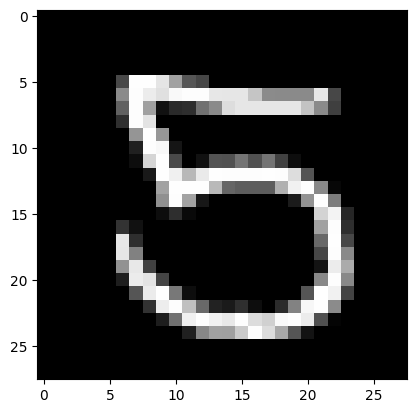

tensor(5)


In [2]:
import matplotlib.pyplot as plt

dataiter = iter(train_loader)
images, labels = next(dataiter)

plt.imshow(images[6].numpy().squeeze(), cmap='gray')
plt.show()

print(labels[6])

In [3]:
# Import libraries for defining neural networks and their operations
import torch.nn as nn
import torch.nn.functional as F

# Define a neural network class inheriting from nn.Module
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define three fully connected (dense) layers:
        # fc1: Input layer, takes in 28x28 pixels (MNIST image size) and outputs 128 features.
        self.fc1 = nn.Linear(28*28, 128)
        # fc2: Hidden layer, takes in 128 features and outputs 128 features.
        self.fc2 = nn.Linear(128, 128)
        # fc3: Output layer, takes in 128 features and outputs 10 features (corresponding to 10 digits in MNIST).
        self.fc3 = nn.Linear(128, 10)

    # Define the forward pass of the neural network
    def forward(self, x):
        # Flatten the input image to a vector of 28*28 = 784 features
        x = x.view(-1, 28*28)
        # Pass through the first fully connected layer and apply ReLU activation function
        x = F.relu(self.fc1(x))
        # Pass through the second fully connected layer and apply ReLU activation function
        x = F.relu(self.fc2(x))
        # Pass through the third fully connected layer and apply softmax for classification over 10 classes
        x = F.softmax(self.fc3(x), dim=1)
        return x

# Instantiate the neural network model
model = Net()

In [4]:
# Import the optimizer module from PyTorch
import torch.optim as optim

# Define the loss function (CrossEntropyLoss) which is suitable for multi-class classification problems
criterion = nn.CrossEntropyLoss()

# Define the optimizer (Adam) with the model's parameters and a learning rate of 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [5]:

# Set the number of epochs (full passes through the training data)
epochs = 10

# Start the training loop
for epoch in range(epochs):
    running_loss = 0.0  # Initialize running loss to accumulate the loss for each epoch
    for i, (images, labels) in enumerate(train_loader, 1):  # Loop over the batches in train_loader
        optimizer.zero_grad()  # Reset gradients to zero for each batch
        outputs = model(images)  # Forward pass: compute the network output for the current batch
        loss = criterion(outputs, labels)  # Compute the loss between predictions and actual labels
        loss.backward()  # Backpropagate the loss to compute gradients for the weights
        optimizer.step()  # Update the weights using the optimizer
        running_loss += loss.item()  # Accumulate the batch loss

    # Print the average loss for the epoch
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/i:.4f}")

Epoch [1/10], Loss: 1.6488
Epoch [2/10], Loss: 1.5423
Epoch [3/10], Loss: 1.5255
Epoch [4/10], Loss: 1.5154
Epoch [5/10], Loss: 1.5103
Epoch [6/10], Loss: 1.5053
Epoch [7/10], Loss: 1.5028
Epoch [8/10], Loss: 1.5005
Epoch [9/10], Loss: 1.4983
Epoch [10/10], Loss: 1.4980


In [6]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total}%')

Test Accuracy: 95.78%


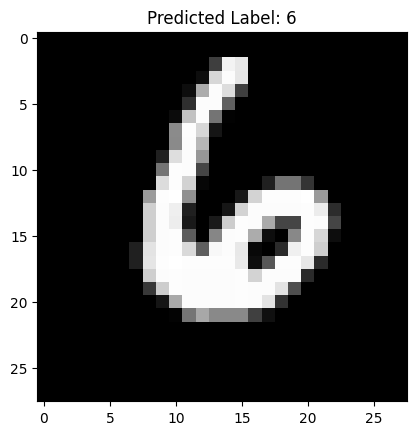

In [7]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

outputs = model(images[1:2])
_, predicted = torch.max(outputs.data, 1)

plt.imshow(images[1].numpy().squeeze(), cmap='gray')
plt.title(f"Predicted Label: {predicted.item()}")
plt.show()